# M11 Visualizing high dimensional data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

sns.set_style('white')

%matplotlib inline

## Scatterplot matrix for low-high dimensional data

In many cases, the number of dimensions is not too large. For instance, the ["Iris" dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) contains four dimensions of measurements on the three types of iris flower species. It's more than two dimensions, yet still manageable. 

In [2]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


We get four dimensions (sepal_length, sepal_width, petal_length, petal_width). One direct way to visualize them is to have a scatter plot for each pair of dimensions. We can use the [**`pairplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function in seaborn to do this.

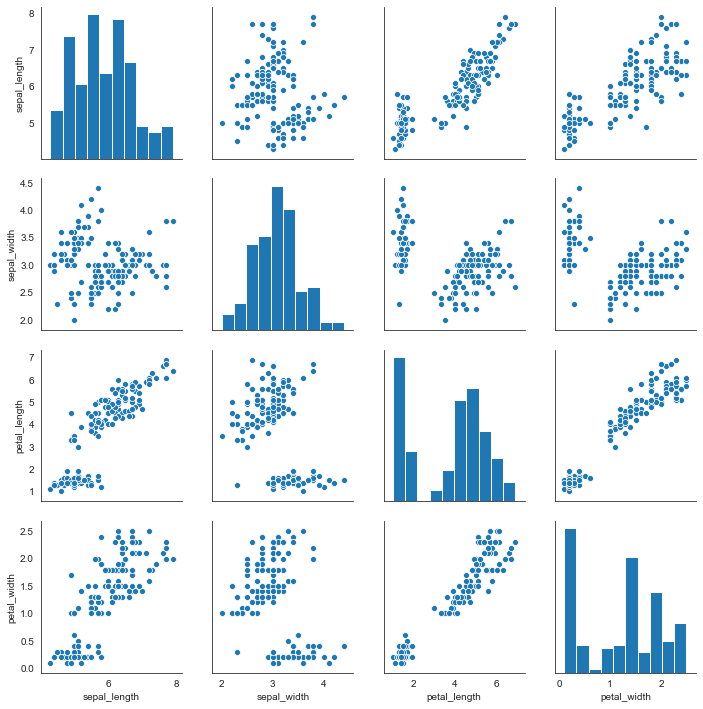

In [3]:
sns.pairplot(iris)

By using colors, you can get a much more useful plot. 

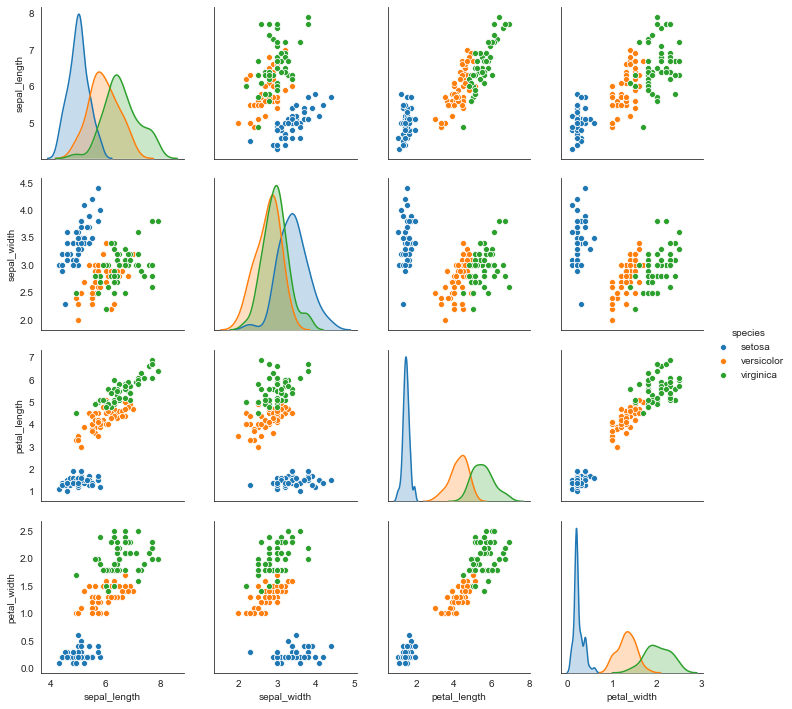

In [4]:
sns.pairplot(iris, hue='species')

Seaborn also lets us to specify what to put in the diagonal. Let's try KDE. see https://seaborn.pydata.org/generated/seaborn.pairplot.html

**Q: draw a pairplot with KDE on the diagonal**

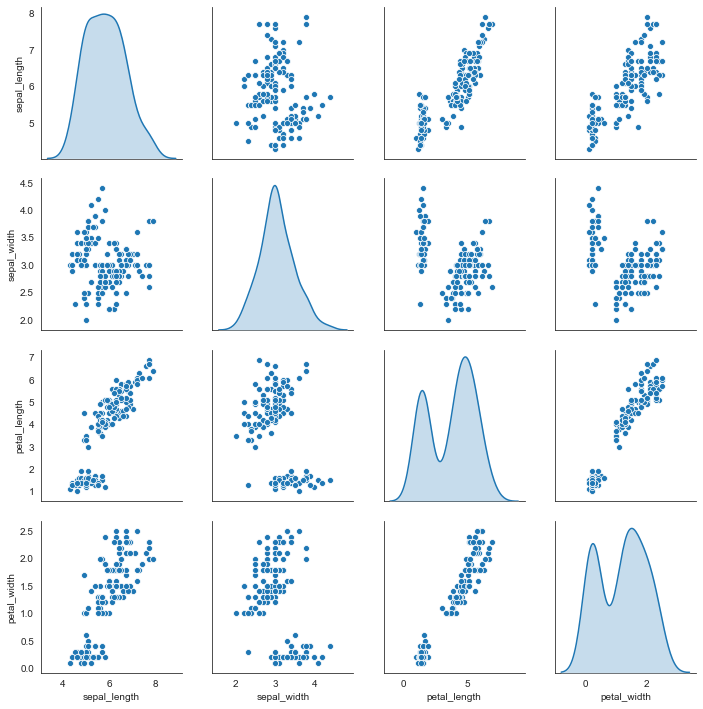

In [5]:
sns.pairplot(iris,diag_kind='kde')

We can use altair to create an interactive scatterplot matrix. Can you create a scatterplot matrix of iris dataset by consulting https://altair-viz.github.io/gallery/scatter_matrix.html?

**Q: Draw an interactive scatterplot matrix for iris dataset in altair**

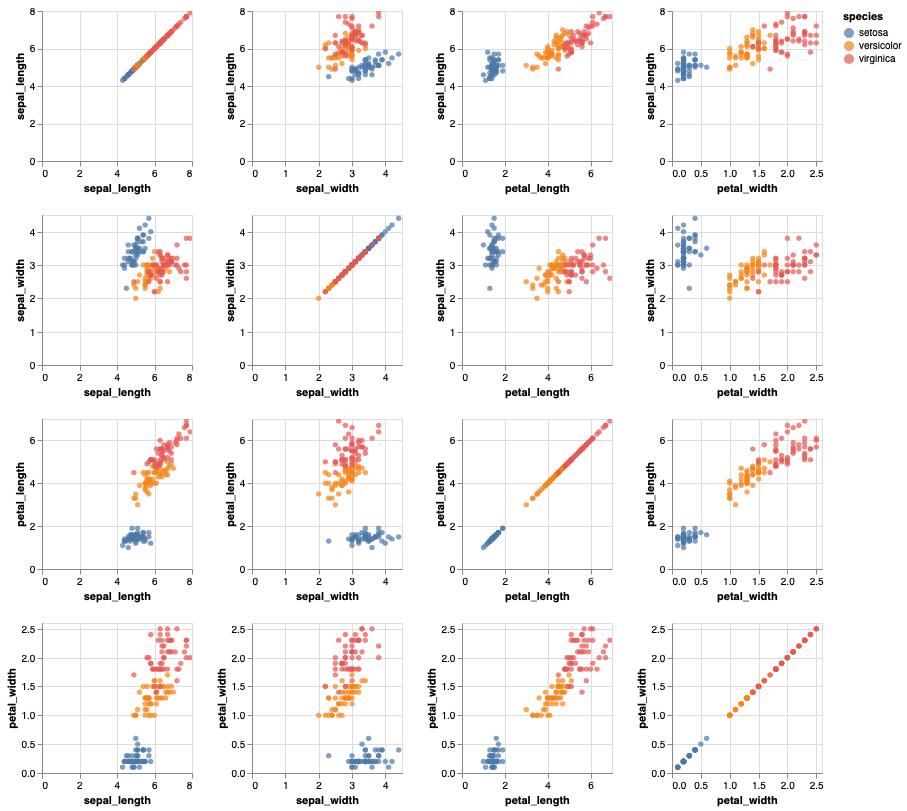

In [6]:
import altair as alt

# comment if you are not using jupyter notebook
alt.renderers.enable('notebook')

# Implement
alt.Chart(iris).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
).interactive()

## Parallel coordinates

Another useful visualization you can create with not-so-high-dimensional datasets is parallel coordinate visualization. Actually pandas supports parallel coordinate plots as well as "Andrews curve" (you can think of it as a smooth version of parallel coordinate. 

- https://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates
- https://pandas.pydata.org/pandas-docs/stable/visualization.html#andrews-curves


**Q: Can you draw a parallel coordinate plot and a andrews curve plot of iris dataset?**  (I'm using `viridis` and `winter` colormap btw)


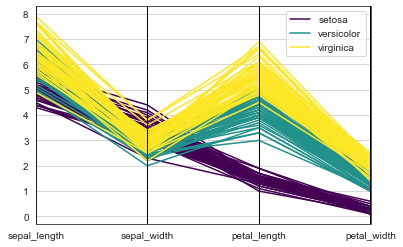

In [7]:
from pandas.plotting import parallel_coordinates, andrews_curves

# Implement
parallel_coordinates(iris,'species',colormap='viridis')

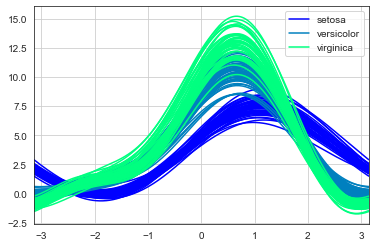

In [8]:
# Implement
andrews_curves(iris,'species',colormap='winter')

We can also use altair. 

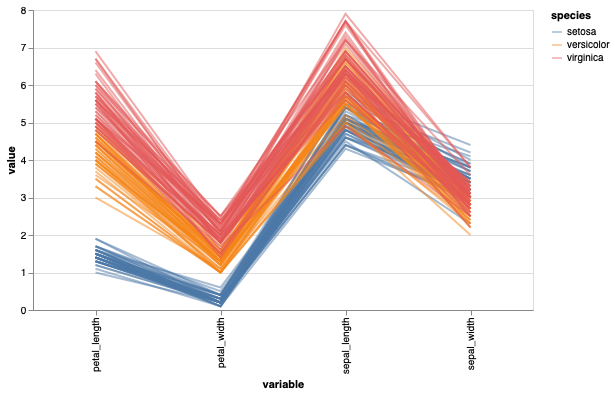

In [9]:
iris_transformed = iris.reset_index().melt(['species', 'index'])
alt.Chart(iris_transformed).mark_line().encode(
    x='variable:N',
    y='value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5),
).properties(width=500)

**Q: can you explain how `iris_transformed` is different from the original `iris` dataset and why do we need to transform in this way?**

Explain: The new dataset is tidy data, and the reason of doing this transformation is to plot the parallel coorfinate plot because now is easy to extract the needed variable.

## PCA 

The [principal component analysis (PCA)](http://setosa.io/ev/principal-component-analysis/) is the most basic dimensionality reduction method. For example, in the Iris dataset we have four variables (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`). If we can reduce the number of variables to two, then we can easily visualize them in two dimensions. 

PCA is already implemented in the [scikit-learn](http://scikit-learn.org/stable/) package, a machine learning library in Python, which should have been included in Anaconda. If you don't have it, install it with:

    conda install scikit-learn

or

    pip install scikit-learn

In [10]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


This is a four dimensional data. To run the PCA we want to isolate only the numerical columns. 

In [11]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_only_features = iris[features]
iris_only_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We should first create a PCA object and specify the number of components to obtain. Note that you can obtain more than two principal components. 

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # set the number of components to 2

Now you can run `fit()` method to identify principal components. 

In [13]:
pca_iris_fitted = pca.fit(iris_only_features)

An important set of numbers that you want to look at is the *explained variance ratio*. 

In [14]:
pca_iris_fitted.explained_variance_ratio_

array([0.92461872, 0.05306648])

It tells you how much of the variance in the original dataset is explained by the principal components that you obtained. It seems like the first two components capture more than 95% of the variance in original dataset. This means that the PCA is very effective on this dataset and just using two principal components is a very good approximation to use all dimensions. Now you can use the result to transform the original dataset. 

In [15]:
iris_pca = pca_iris_fitted.transform(iris_only_features)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

A convenient way to do both fitting and transforming is 

In [16]:
iris_pca = pca.fit_transform(iris_only_features)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

You can see that this transformed matrix has two columns. Each column corresponds to the "loading" for one of the principal components. 

In [17]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
iris_pca_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


Let's add the species information to the dataframe. 

**Q: add species column to `iris_pca_df`.**

In [18]:
# Implement
iris_pca_df['species']=iris['species']
iris_pca_df.head()

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


Now we can produce a scatterplot based on the two principal components. Well, let's just draw a pairplot. 

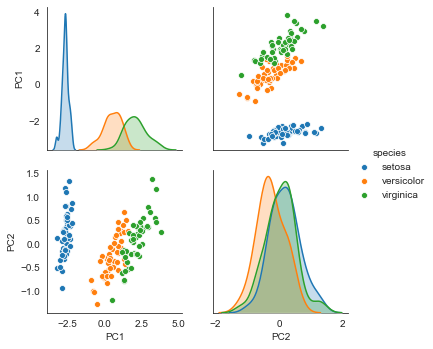

In [19]:
# Implement
sns.pairplot(iris_pca_df,hue='species')

The PC1 seems to capture inter-species variation while PC2 seems to capture intra-species variation. 🧐 Interesting!

### PCA with faces

Let's play with PCA with some faces. 🙄😬🤓

In [20]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data

In [21]:
n_samples, n_features = faces.shape
print(n_samples)
print(n_features)

400
4096


So, this dataset contains 400 faces, and each of them has 4096 features (=pixels). Let's look at the first face:

In [22]:
print(faces[0].shape)
faces[0]

(4096,)


array([0.6694215 , 0.6363636 , 0.6487603 , ..., 0.08677686, 0.08264463,
       0.07438017], dtype=float32)

It's an one-dimensional array with 4096 numbers. But a face should be a two-dimensional picture, right? Use `numpy`'s [**`reshape()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) function as well as `matplotlib`'s [**`imshow()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) function, transform this one-dimensional array into an appropriate 2-D matrix and draw it to show the face. You probably want to use `plt.cm.gray` as colormap. 

Be sure to play with different shapes (e.g. 2 x 2048, 1024 x 4, 128 x 32, and so on) and think about why they look like what they look like. What is the right shape of the array?

**Q: reshape the one-dimensional array into an appropriate two dimensional array and show the face**

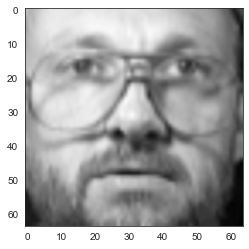

In [23]:
# TODO: draw faces[0] with various shapes. Find the correct dimension. 

image_shape = (64,64)
plt.imshow(faces[0].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')

Let's perform PCA on this dataset.

In [24]:
from sklearn.decomposition import PCA

Set the number of components to 6:

In [25]:
n_components=6
pca = PCA(n_components=n_components)

Fit the faces data:

In [26]:
pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA has an attribute called `components_`. It is a $\text{n_components} \times \text{n_features}$ matrix, in our case $6 \times 4096$. Each row is a component.

In [27]:
pca.components_

array([[-0.00419112, -0.0071095 , -0.0093361 , ...,  0.00018516,
         0.00337966,  0.00318826],
       [-0.02859139, -0.03328837, -0.03784652, ...,  0.02962781,
         0.02721298,  0.02488898],
       [ 0.00135691, -0.00032575, -0.00019799, ..., -0.01541368,
        -0.01370981, -0.01188343],
       [ 0.00112416, -0.00179051, -0.01168247, ...,  0.02943012,
         0.02781926,  0.02521855],
       [-0.02384403, -0.02359277, -0.02216291, ..., -0.04243898,
        -0.04007388, -0.04110258],
       [ 0.02909851,  0.03130364,  0.02877586, ..., -0.01635627,
        -0.01637309, -0.01490942]], dtype=float32)

In [28]:
pca.components_.shape

(6, 4096)

We can display the 6 components as images:

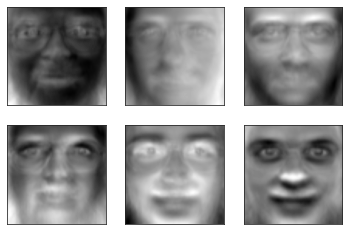

In [29]:
for i, comp in enumerate(pca.components_, 1):
    plt.subplot(2, 3, i)
    plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
    plt.xticks(())
    plt.yticks(())

😱 Looks a bit scary... 

They are the "principal faces", which means that, by adding up these images with some appropriate weights, we can get a close approximation of the 400 images in the dataset!

We can get the coordinates of the 6 components to understand how each face is composed with the components.

In [30]:
faces_pca_transformed = pca.transform(faces)

In [31]:
faces_pca_transformed.shape

(400, 6)

`faces_r` is a $400 \times 6$ matrix. Each row corresponds to one face, containing the coordinates of the 6 components. For instance, the coordinates for the first face is

In [32]:
faces_pca_transformed[0]

array([ 0.8157955 , -4.144033  ,  2.483267  , -0.9030691 ,  0.83137226,
        0.8865175 ], dtype=float32)

It seems that the second component (with coordinate 4.14403343) contributes the most to the first face. Let's display them together and see how similar they are:

([], <a list of 0 Text yticklabel objects>)

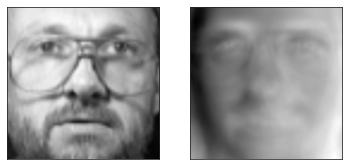

In [33]:
# display the first face image 
plt.subplot(1, 2, 1)
plt.imshow(faces[0].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
plt.xticks(())
plt.yticks(())

# display the second component
plt.subplot(1, 2, 2)
plt.imshow(pca.components_[1].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
plt.xticks(())
plt.yticks(())

We can display the composition of faces in an "equation" style:

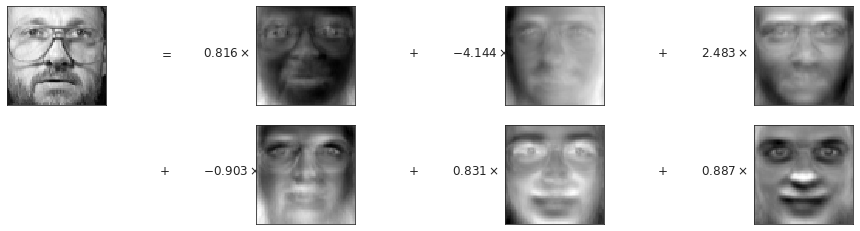

In [34]:
from matplotlib import gridspec

def display_image(ax, image):
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_xticks(())
    ax.set_yticks(())

def display_text(ax, text):
    ax.text(.5, .5, text, size=12)
    ax.axis('off')

face_idx = 0

plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(2, 10, width_ratios=[5,1,1,5,1,1,5,1,1,5])

# display the face
ax = plt.subplot(gs[0])
display_image(ax, faces[face_idx].reshape(image_shape))

# display the equal sign
ax = plt.subplot(gs[1])
display_text(ax, r'$=$')

# display the 6 coordinates
for coord_i, gs_i in enumerate( [2,5,8,12,15,18] ):
    ax = plt.subplot(gs[gs_i])
    display_text( ax, r'$%.3f \times $' % faces_pca_transformed[face_idx][coord_i] )

# display the 6 components
for comp_i, gs_i in enumerate( [3,6,9,13,16,19] ):
    ax = plt.subplot(gs[gs_i])
    display_image( ax, pca.components_[comp_i].reshape(image_shape) )

# display the plus sign
for gs_i in [4,7,11,14,17]:
    ax = plt.subplot(gs[gs_i])
    display_text(ax, r'$+$')

We can directly see the results of this addition. 

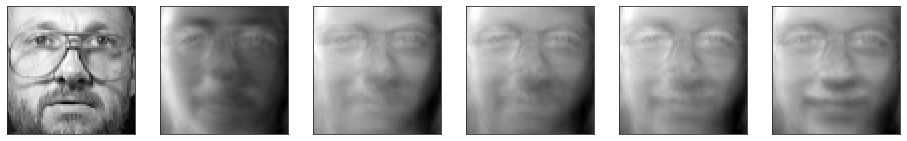

In [35]:
f, axes = plt.subplots(1, 6, figsize=(16,4))

faceid = 0

constructed_faces = []
for i in range(2, 10):
    constructed_faces.append(np.dot(faces_pca_transformed[faceid][:i], pca.components_[:i]))

# the face that we want to construct. 
display_image(axes[0], faces[0].reshape(image_shape))

for idx, ax in enumerate(axes[1:]):
    display_image(ax, constructed_faces[idx].reshape(image_shape))

It becomes more and more real, although quite far with only several components. 

## NMF

There is another pretty cool dimensionality reduction method called NMF (Non-negative matrix factorization). It is widely used in many domains, such as identifying topics in documents, identifying key components in images, and so on. The key idea is by forcing every element in the decomposed matrices positive, NMF breaks something into **parts** that we can add together. 

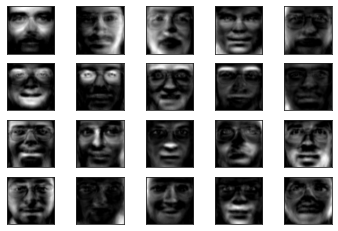

In [36]:
from sklearn.decomposition import NMF
n_components=20
nmf = NMF(n_components=n_components)
nmf_fitted = nmf.fit(faces)

for i, comp in enumerate(nmf_fitted.components_, 1):
    plt.subplot(4, 5, i)
    plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
    plt.xticks(())
    plt.yticks(())

As you can see here, each 'component' of NMF picks up a certain part of the face (light area), such as eyes, chin, nose, and so on. Very cool. 

In [37]:
faces_nmf_transformed = nmf_fitted.transform(faces)

In [38]:
faces_nmf_transformed[0]

array([0.5520776 , 0.        , 0.32749933, 0.        , 0.33536059,
       0.48529949, 0.60126777, 0.54280852, 0.32355264, 0.15625338,
       0.        , 0.09343447, 0.09757006, 0.        , 0.59323739,
       0.22327449, 0.        , 0.32718829, 0.22656205, 0.        ])

Can you show the reconstructed faces using the first n components, as we did for the PCA? 

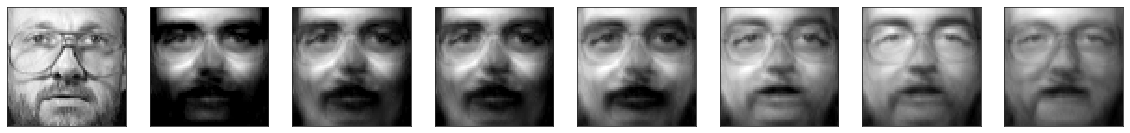

In [39]:
f, axes = plt.subplots(1, 8, figsize=(20,4))
faceid = 0
constructed_faces = []

# Implement
for i in range(2, 10):
    constructed_faces.append(np.dot(faces_nmf_transformed[faceid][:i], nmf.components_[:i]))

display_image(axes[0], faces[0].reshape(image_shape))

for idx, ax in enumerate(axes[1:]):
    display_image(ax, constructed_faces[idx].reshape(image_shape))

Unlike PCA that keeps superposing positive and negative images, NMF tends to gradually add multiple parts to the image. This is why it is widely used for many decomposing tasks such as detecting topics from documents. 

## t-SNE, Isomap, and MDS

Isomap, t-SNE, and MDS are nonlinear dimensionality reduction methods. Isomap preserves only the local relationships, MDS tries to preserve everything, and t-SNE is more flexible. t-SNE is very popular especially in machine learning. 

Let's try t-SNE out with the iris data. 

**Q: Fit-transform the iris data with t-SNE and create a scatterplot of it.**

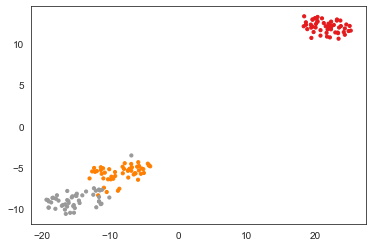

In [40]:
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.datasets import load_iris

iris = load_iris()

# Implement
X_tsne = TSNE().fit_transform(iris.data)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1',s=10)

The hyperparameter `perplexity` determines how to balance attention between local and global aspects of your data. Changing this parameter (default is 30) may cause drastic changes in the output. Play with multiple values of perplexity. 

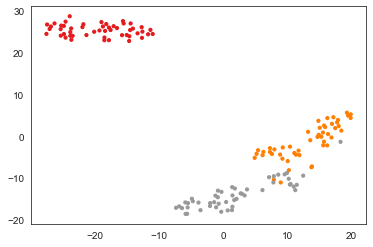

In [41]:
X_tsne = TSNE(learning_rate=100, perplexity=15).fit_transform(iris.data)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='Set1', s=10)

If you want to learn more about t-SNE, play with https://distill.pub/2016/misread-tsne/ and https://experiments.withgoogle.com/visualizing-high-dimensional-space

### Visualizing the Digits dataset

This is a classic dataset of images of handwritten digits. It contains 1797 images with \(8*8=64\) pixels each.



In [42]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

digits.data stores the images:

In [43]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

and digits.target is the classes (or labels) that the images belong to. There are 10 classes in total.

In [44]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

**Q: use `imshow` to display the first image.**

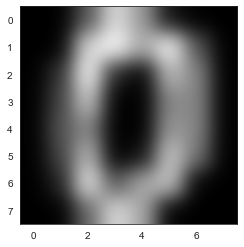

In [45]:
# Implement
plt.imshow(digits.data[0].reshape(8,8),cmap=plt.cm.gray, interpolation='gaussian')

Let's first reorder the data points according to the handwritten numbers. We can use [np.vstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html) and [np.hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html).

In [46]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

Then initialize a tsne model. For the meaning of the parameters see [here](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

In [47]:
tsne = TSNE(n_components=2, init='pca', random_state=0)

Fit the model on the data.

In [48]:
digits_proj = tsne.fit_transform(X)

Plot the results. Seaborn's [hls](http://seaborn.pydata.org/generated/seaborn.hls_palette.html#seaborn.hls_palette) palatte provides evenly spaced colors in HLS hue space, we can divide it into 10 colors.

In [49]:
palette = np.array(sns.color_palette("hls", 10))

Make a scatter plot of the first component against the second component, with color based on the numbers.

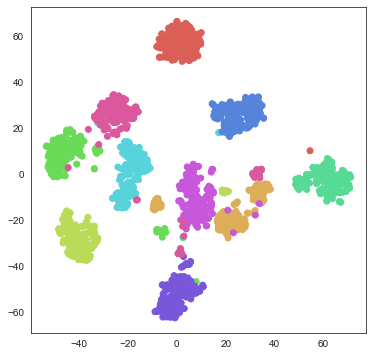

In [50]:
plt.figure(figsize = (6,6))
plt.scatter(digits_proj[:,0], digits_proj[:,1],c=palette[y])

We can add some text for each cluster. The place of the text can be the center of the cluster. We can use `np.median` to find the centers. To simplify things, we can make the code into a function.

In [51]:
def plot_scatter(projection):
    plt.figure(figsize = (6,6))
    plt.scatter(projection[:,0], projection[:,1],c=palette[y])
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(projection[y == i, :], axis=0)
        txt = plt.text(xtext, ytext, str(i), fontsize=24)

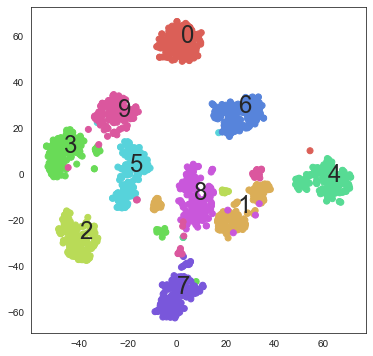

In [52]:
plot_scatter(digits_proj)

### Comparison with Isomap and MDS

We talked about MDS and Isomap in class as two other manifold learning methods. Sklearn also has implementations for this two algorithms: [MDS](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) and [Isomap](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html), so the usage is very similar. Examples for using this methods can be found [here](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html).

Can you make another two plots with these two methods? You only need to change the models and call the `plot_scatter` function, 

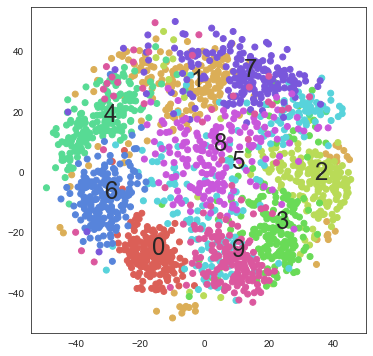

In [53]:
# Implement
X_mds = MDS().fit_transform(X)
plot_scatter(X_mds)

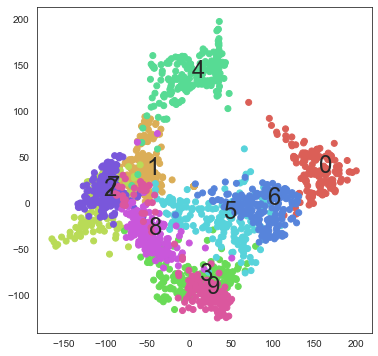

In [54]:
# Implement
X_isomap = Isomap().fit_transform(X)
plot_scatter(X_isomap)